<a href="https://colab.research.google.com/github/leonardo-91/sistemas-inteligentes/blob/main/E5_Proyecto_Final_Sistemas_Inteligentes_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifica Universidad Javeriana**

Sistemas Inteligentes


---



**Grupo:**

1.   Edison Leonardo Neira Espitia
2.   Sergio Rairan
3.   Sebastian Herrara




---





# **Sistema inteligente para la segmentación de clientes con el fin de potencializar y optimizar la conversión de la campaña deposito financiero**



---



# **Contexto**

Una institución bancaria portuguesa, propone a través de una campaña de marketing basada en llamadas telefónica, predecir si un usuario se suscribirá a un depósito a plazos. De cada usuario intentan saber atributos como el trabajo actual, el nivel de educación, el incumplimiento financiero, etc. Actualmente, la institución realiza las llamadas sin clasificar ni priorizar clientes, como consecuencia se tiene un tiempo elevado en la labor e incomodidad en clientes que no cumplan con el perfil.



## **Objetivo**

Aumentar el número de clientes que se suscriben y al mismo tiempo eficientar la operación de la campaña de depósito financiero (CDT) a partir de estrategias orientadas a la conversión de usuarios usando cuatro técnicas de IA utilizando datos de los años 2012 - 2014 con un nivel mínimo de precisión del 80% de conversión, buscando ampliar el recaudo financiero para la compañía (Banco), posibilitando el aumento del índice de inversión y por ende el aumento de las utilidades. Esperamos analizar estos cuatro tipos de técnicas de IA por medio de Google Colabs usando Python 3.7 como leguaje de programación, y Scikit-Learn como librería de apoyo para la implementación de los diferentes algoritmos, a su vez usaremos el set de datos públicos de una institución financiera de Portugal que se encuentra alojado en Center of Machine Learning  and Intellignet system (UCI), tenemos como objetivo desarrollar este análisis en el transcurso del curso que se estima será de 3 meses.  



---



## **Desarrollo**

In [ ]:
!python --version

Python 3.7.13


Instalamos libreria para usar **Fuzzy** sobre python usando la libreria **scikit-fuzzy**

In [ ]:
!pip install scikit-fuzzy

**Librerías**

In [ ]:
import numpy as np
import pandas as pd
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

**Matriz de confusión**

In [ ]:
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',classes[0],classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

**Cargue de datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Ruta leo : "/content/drive/MyDrive/Maestria IA/Sistemas Inteligentes/Proyecto Final SI/Set de datos/bank-full.csv"
#Ruta Sergio : "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"
#Ruta Sebastián: "/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv"

df_bank = pd.read_csv("/content/drive/MyDrive/Proyecto Final/Set de datos/bank-full.csv", sep=";")

In [ ]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Eliminacion de variables

En este caso vamos a eliminar las variables que descartamos de acuerdo a nuestro analisis realizado

In [ ]:
df_bank.drop(inplace=True,axis=1,columns=["job","default","housing","contact","day","month","duration","campaign","pdays","poutcome"])

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   balance    45211 non-null  int64 
 4   loan       45211 non-null  object
 5   previous   45211 non-null  int64 
 6   y          45211 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [ ]:
df_bank.balance.value_counts().sort_index()

-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66721     1
 71188     1
 81204     2
 98417     1
 102127    1
Name: balance, Length: 7168, dtype: int64

**Limpieza y Calidad de datos**

Variable **Education**, eliminacion de registros desconocidos

In [ ]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df_bank=df_bank[~df_bank.education.isin(['unknown'])]

In [ ]:
df_bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

Variable **Previous**, eliminacion de ruido (Registros  errados)

In [ ]:
df_bank.previous.value_counts().sort_index()

0      35420
1       2656
2       2011
3       1098
4        695
5        446
6        269
7        197
8        127
9         88
10        63
11        60
12        42
13        36
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         4
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
Name: previous, dtype: int64

In [ ]:
df_bank=df_bank[~df_bank.previous.isin([275])]

# Implementacion Fuzzy

In [ ]:
import skfuzzy as fuzz
import random
from skfuzzy import control as ctrl

Creacion de **variables Fuzzy**

In [ ]:
age = ctrl.Antecedent(np.arange(32, 95, 1), 'age')
previous = ctrl.Antecedent(np.arange(0, 58, 1), 'previous')
balance = ctrl.Antecedent(np.arange(0, 140000, 1), 'balance')
marital = ctrl.Antecedent(np.arange(0, 4, 1), 'marital')
loan = ctrl.Antecedent(np.arange(0, 1, 0.1), 'loan')
education = ctrl.Antecedent(np.arange(0, 4, 1), 'education')
y = ctrl.Consequent(np.arange(0, 1, 0.1), 'y')

Creacion de rangos **Fuzzy** **Triangualar**

In [ ]:
age["Joven"] = fuzz.gaussmf(age.universe, 32, (50-32) ** 0.5)
age["Adulto"] = fuzz.gaussmf(age.universe, 55, 15 ** 0.5)
age["Adulto Mayor"] = fuzz.gaussmf(age.universe, 95, (95-65)**0.5)

previous["Bajo"] = fuzz.trimf(previous.universe, [0,0,1])
previous["Medio"] = fuzz.gaussmf(previous.universe, 6, 4 ** 0.5)
previous["Alto"] = fuzz.trimf(previous.universe, [9,58,58])

balance["Bajo"] = fuzz.trimf(balance.universe, [-8019,-8019,15000])
balance["Medio"] = fuzz.gaussmf(balance.universe, 35000, 15000)
balance["Alto"] = fuzz.trimf(balance.universe, [50000,140000,140000])

marital["Soltero"] = fuzz.trimf(marital.universe, [0,0,2])
marital["Casado"] = fuzz.gaussmf(marital.universe, 2, 0.5)
marital["Divorciado"] = fuzz.trimf(marital.universe, [2,4,4])

loan["No"] = fuzz.trimf(loan.universe, [0,0,0.6])
loan["Si"] = fuzz.trimf(loan.universe, [0.4,1,1])

education["Primaria"] = fuzz.trimf(education.universe, [0,0,2])
education["Segundaria"] = fuzz.trimf(education.universe, [1,2,3])
education["Universitario"] = fuzz.trimf(education.universe, [2,4,4])

y["Bajo"] = fuzz.trimf(y.universe, [0,0,0.4])
y["Alto"] = fuzz.gaussmf(y.universe, 0.45, 0.1)
y["Muy Alto"] = fuzz.trimf(y.universe, [.7,1,1])

Visualizamos las graficas **triangulares** de cada variables Fuzzy

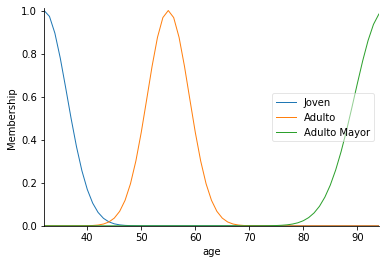

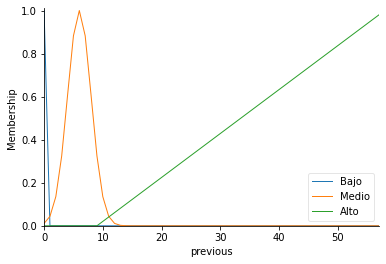

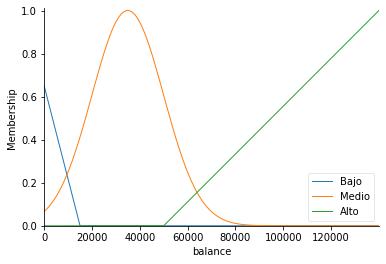

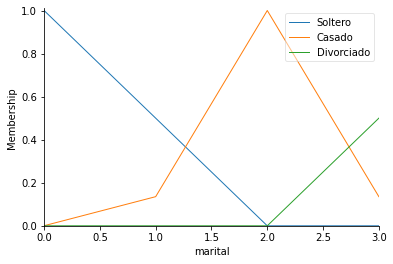

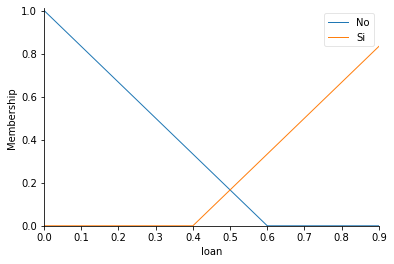

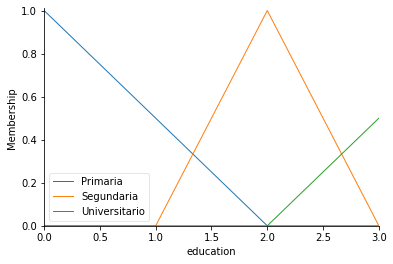

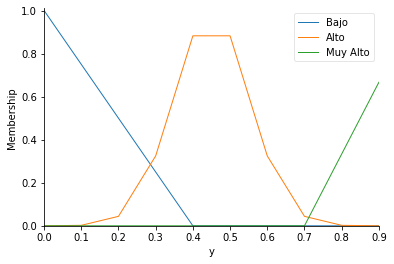

In [ ]:
age.view()
previous.view()
balance.view()
marital.view()
loan.view()
education.view()
y.view()

Creacion de las **reglas fuzzy** analizadas para nuestro ejercicio

In [ ]:
# rule1 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Muy Alto'])
# rule2 = ctrl.Rule(age['Adulto'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
# rule3 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
# rule4 = ctrl.Rule(age['Joven'] & previous['Alto'] & balance['Alto'] & marital['Soltero'] & loan['Si'] & education['Universitario'], y['Alto'])
# rule5 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Segundaria'], y['Alto'])
# rule6 = ctrl.Rule(age['Adulto'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
# rule7 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
# rule8 = ctrl.Rule(age['Joven'] & previous['Medio'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Segundaria'], y['Bajo'])
# rule9 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Divorciado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
# rule10 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['Si'] & education['Primaria'], y['Bajo'])
# rule11 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Bajo'] & marital['Casado'] & loan['Si'] & education['Segundaria'], y['Bajo'])
# rule12 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Segundaria'], y['Alto'])
# rule13 = ctrl.Rule(age['Adulto Mayor'] & previous['Medio'] & balance['Alto'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Muy Alto'])
# rule14 = ctrl.Rule(age['Adulto Mayor'] & previous['Alto'] & balance['Alto'] & marital['Divorciado'] & loan['No'] & education['Universitario'], y['Alto'])
# rule15 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Medio'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])
# rule16 = ctrl.Rule(age['Joven'] & previous['Bajo'] & balance['Medio'] & marital['Casado'] & loan['No'] & education['Universitario'], y['Alto'])
# rule17 = ctrl.Rule(age['Adulto'] & previous['Bajo'] & balance['Bajo'] & marital['Soltero'] & loan['No'] & education['Universitario'], y['Alto'])

In [ ]:
# rule1 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule2 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule3 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'], y['Bajo'])
# rule4 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'], y['Alto'])
# rule5 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'], y['Alto'])
# rule6 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'], y['Muy Alto'])
# rule7 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'], y['Alto'])
# rule8 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'], y['Muy Alto'])
# rule9 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'], y['Muy Alto'])
# rule10 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule11 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule12 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'], y['Bajo'])
# rule13 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule14 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule15 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'], y['Bajo'])
# rule16 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'], y['Alto'])
# rule17 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'], y['Alto'])
# rule18 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'], y['Alto'])

In [ ]:
rule1 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule2 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule3 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule4 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule5 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule6 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule7 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule8 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule9 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule10 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule11 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule12 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule13 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule14 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule15 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule16 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule17 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule18 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule19 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule20 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule21 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule22 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule23 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule24 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule25 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule26 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule27 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule28 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule29 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule30 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule31 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule32 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule33 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule34 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule35 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule36 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule37 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule38 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule39 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule40 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule41 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule42 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule43 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule44 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule45 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule46 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule47 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule48 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule49 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule50 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule51 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule52 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule53 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule54 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule55 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule56 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule57 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule58 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule59 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule60 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule61 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule62 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule63 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule64 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule65 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule66 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule67 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule68 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule69 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule70 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule71 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule72 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule73 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule74 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule75 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule76 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule77 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule78 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule79 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule80 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule81 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule82 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule83 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule84 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule85 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule86 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule87 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule88 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule89 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule90 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule91 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule92 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule93 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule94 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule95 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule96 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule97 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule98 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule99 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule100 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule101 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule102 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule103 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule104 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule105 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule106 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule107 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule108 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule109 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule110 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule111 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule112 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule113 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule114 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule115 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule116 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule117 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule118 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule119 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule120 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule121 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule122 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule123 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule124 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule125 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule126 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule127 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule128 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule129 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule130 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule131 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule132 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule133 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule134 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule135 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule136 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule137 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule138 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule139 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule140 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule141 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule142 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule143 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule144 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule145 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule146 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule147 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule148 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule149 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule150 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule151 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule152 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule153 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule154 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule155 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule156 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule157 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule158 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule159 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule160 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule161 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule162 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule163 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule164 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule165 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule166 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule167 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule168 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule169 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule170 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule171 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule172 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule173 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule174 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule175 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule176 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule177 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule178 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule179 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule180 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule181 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule182 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule183 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule184 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule185 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule186 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule187 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule188 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule189 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule190 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule191 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule192 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule193 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule194 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule195 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule196 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule197 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule198 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule199 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule200 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule201 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule202 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule203 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule204 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule205 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule206 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule207 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule208 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule209 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule210 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule211 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule212 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule213 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule214 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule215 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule216 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule217 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule218 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule219 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule220 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule221 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule222 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule223 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule224 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule225 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule226 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule227 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule228 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule229 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule230 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule231 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule232 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule233 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule234 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule235 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Muy Alto'])
rule236 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Muy Alto'])
rule237 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Muy Alto'])
rule238 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Muy Alto'])
rule239 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Muy Alto'])
rule240 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Muy Alto'])
rule241 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Muy Alto'])
rule242 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Muy Alto'])
rule243 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['No'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Muy Alto'])
rule244 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule245 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule246 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule247 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule248 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule249 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule250 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule251 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule252 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule253 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule254 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule255 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule256 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule257 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule258 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule259 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule260 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule261 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule262 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule263 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule264 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule265 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule266 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule267 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule268 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule269 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule270 = ctrl.Rule(age['Joven'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule271 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule272 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule273 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule274 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule275 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule276 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule277 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule278 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule279 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule280 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule281 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule282 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule283 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule284 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule285 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule286 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule287 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule288 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule289 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule290 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule291 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule292 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule293 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule294 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule295 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule296 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule297 = ctrl.Rule(age['Adulto'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule298 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule299 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule300 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule301 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule302 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule303 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule304 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule305 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule306 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule307 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule308 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule309 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule310 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule311 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule312 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule313 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule314 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule315 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule316 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule317 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule318 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule319 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule320 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule321 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule322 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule323 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule324 = ctrl.Rule(age['Adulto Mayor'] & balance['Bajo'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule325 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule326 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule327 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule328 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule329 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule330 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule331 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule332 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule333 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule334 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule335 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule336 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule337 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule338 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule339 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule340 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule341 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule342 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule343 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule344 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule345 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule346 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule347 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule348 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule349 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule350 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule351 = ctrl.Rule(age['Joven'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule352 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule353 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule354 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule355 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule356 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule357 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule358 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule359 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule360 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule361 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule362 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule363 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule364 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule365 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule366 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule367 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule368 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule369 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule370 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule371 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule372 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule373 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule374 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule375 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule376 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule377 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule378 = ctrl.Rule(age['Adulto'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule379 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule380 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule381 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule382 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule383 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule384 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule385 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule386 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule387 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule388 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule389 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule390 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule391 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule392 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule393 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule394 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule395 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule396 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule397 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Bajo'])
rule398 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Bajo'])
rule399 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Bajo'])
rule400 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Bajo'])
rule401 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Bajo'])
rule402 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Bajo'])
rule403 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Bajo'])
rule404 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Bajo'])
rule405 = ctrl.Rule(age['Adulto Mayor'] & balance['Medio'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Bajo'])
rule406 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule407 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule408 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule409 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule410 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule411 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule412 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule413 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule414 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule415 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule416 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule417 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule418 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule419 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule420 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule421 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule422 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule423 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule424 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule425 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule426 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule427 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule428 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule429 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule430 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule431 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule432 = ctrl.Rule(age['Joven'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule433 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule434 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule435 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule436 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule437 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule438 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule439 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule440 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule441 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule442 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule443 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule444 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule445 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule446 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule447 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule448 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule449 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule450 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule451 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule452 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule453 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule454 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule455 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule456 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule457 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule458 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule459 = ctrl.Rule(age['Adulto'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule460 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule461 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule462 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule463 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule464 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule465 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule466 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule467 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule468 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Bajo'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule469 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule470 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule471 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule472 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule473 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule474 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule475 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule476 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule477 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Medio'] & marital['Divorciado'] & education['Universitario'], y['Alto'])
rule478 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Primaria'], y['Alto'])
rule479 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Segundaria'], y['Alto'])
rule480 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Soltero'] & education['Universitario'], y['Alto'])
rule481 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Primaria'], y['Alto'])
rule482 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Segundaria'], y['Alto'])
rule483 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Casado'] & education['Universitario'], y['Alto'])
rule484 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Primaria'], y['Alto'])
rule485 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Segundaria'], y['Alto'])
rule486 = ctrl.Rule(age['Adulto Mayor'] & balance['Alto'] & loan['Si'] & previous['Alto'] & marital['Divorciado'] & education['Universitario'], y['Alto'])

Agregamos las reglas a nuestro algoritmo

In [ ]:
# validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
# validate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17])
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48, rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64, rule65, rule66, rule67, rule68, rule69, rule70, rule71, rule72, rule73, rule74, rule75, rule76, rule77, rule78, rule79, rule80, rule81, rule82, rule83, rule84, rule85, rule86, rule87, rule88, rule89, rule90, rule91, rule92, rule93, rule94, rule95, rule96, rule97, rule98, rule99, rule100, rule101, rule102, rule103, rule104, rule105, rule106, rule107, rule108, rule109, rule110, rule111, rule112, rule113, rule114, rule115, rule116, rule117, rule118, rule119, rule120, rule121, rule122, rule123, rule124, rule125, rule126, rule127, rule128, rule129, rule130, rule131, rule132, rule133, rule134, rule135, rule136, rule137, rule138, rule139, rule140, rule141, rule142, rule143, rule144, rule145, rule146, rule147, rule148, rule149, rule150, rule151, rule152, rule153, rule154, rule155, rule156, rule157, rule158, rule159, rule160, rule161, rule162, rule163, rule164, rule165, rule166, rule167, rule168, rule169, rule170, rule171, rule172, rule173, rule174, rule175, rule176, rule177, rule178, rule179, rule180, rule181, rule182, rule183, rule184, rule185, rule186, rule187, rule188, rule189, rule190, rule191, rule192, rule193, rule194, rule195, rule196, rule197, rule198, rule199, rule200, rule201, rule202, rule203, rule204, rule205, rule206, rule207, rule208, rule209, rule210, rule211, rule212, rule213, rule214, rule215, rule216, rule217, rule218, rule219, rule220, rule221, rule222, rule223, rule224, rule225, rule226, rule227, rule228, rule229, rule230, rule231, rule232, rule233, rule234, rule235, rule236, rule237, rule238, rule239, rule240, rule241, rule242, rule243, rule244, rule245, rule246, rule247, rule248, rule249, rule250, rule251, rule252, rule253, rule254, rule255, rule256, rule257, rule258, rule259, rule260, rule261, rule262, rule263, rule264, rule265, rule266, rule267, rule268, rule269, rule270, rule271, rule272, rule273, rule274, rule275, rule276, rule277, rule278, rule279, rule280, rule281, rule282, rule283, rule284, rule285, rule286, rule287, rule288, rule289, rule290, rule291, rule292, rule293, rule294, rule295, rule296, rule297, rule298, rule299, rule300, rule301, rule302, rule303, rule304, rule305, rule306, rule307, rule308, rule309, rule310, rule311, rule312, rule313, rule314, rule315, rule316, rule317, rule318, rule319, rule320, rule321, rule322, rule323, rule324, rule325, rule326, rule327, rule328, rule329, rule330, rule331, rule332, rule333, rule334, rule335, rule336, rule337, rule338, rule339, rule340, rule341, rule342, rule343, rule344, rule345, rule346, rule347, rule348, rule349, rule350, rule351, rule352, rule353, rule354, rule355, rule356, rule357, rule358, rule359, rule360, rule361, rule362, rule363, rule364, rule365, rule366, rule367, rule368, rule369, rule370, rule371, rule372, rule373, rule374, rule375, rule376, rule377, rule378, rule379, rule380, rule381, rule382, rule383, rule384, rule385, rule386, rule387, rule388, rule389, rule390, rule391, rule392, rule393, rule394, rule395, rule396, rule397, rule398, rule399, rule400, rule401, rule402, rule403, rule404, rule405, rule406, rule407, rule408, rule409, rule410, rule411, rule412, rule413, rule414, rule415, rule416, rule417, rule418, rule419, rule420, rule421, rule422, rule423, rule424, rule425, rule426, rule427, rule428, rule429, rule430, rule431, rule432, rule433, rule434, rule435, rule436, rule437, rule438, rule439, rule440, rule441, rule442, rule443, rule444, rule445, rule446, rule447, rule448, rule449, rule450, rule451, rule452, rule453, rule454, rule455, rule456, rule457, rule458, rule459, rule460, rule461, rule462, rule463, rule464, rule465, rule466, rule467, rule468, rule469, rule470, rule471, rule472, rule473, rule474, rule475, rule476, rule477, rule478, rule479, rule480, rule481, rule482, rule483, rule484, rule485, rule486]
validate_ctrl = ctrl.ControlSystem(rules)
validate_simulator = ctrl.ControlSystemSimulation(validate_ctrl)

Ejecutamos la regla con el 1 registro del dataframe

Funciones de conversion de variables a numericas acorde al rango

In [ ]:
def randomBetweenMarital(marital):
  a,b=0,0
  if marital == 'single':
    a,b=0,2
  elif marital=='married':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [ ]:
def randomBetweenLoan(loan):
  a,b=0,0
  if loan == 'no':
    a,b=0,0.6
  else:
    a,b=0.4,1
  return a+random.random()*(b-a) 

In [ ]:
def randomBetweenEducation(edication):
  a,b=0,0
  if edication == 'primary':
    a,b=0,2
  elif edication=='secondary':
    a,b=1,3
  else:
    a,b=2,4
  return a+random.random()*(b-a) 

In [ ]:
randomBetweenEducation(df_bank.head(1).education[0])

3.8837528650587454

In [ ]:
#58,2143,0.31,0,1.7,3.8

In [ ]:
df_bank = df_bank.reset_index()
df_bank.shape

(43353, 8)

In [ ]:
df_bank.loc[[100]]

,index,age,marital,education,balance,loan,previous,y
100,110,29,divorced,secondary,31,no,0,no


In [ ]:
row = 100

In [ ]:
validate_simulator.input['age'] = df_bank.iloc[[row]].age[row]
validate_simulator.input['balance'] = df_bank.iloc[[row]].balance[row]
validate_simulator.input['loan'] = randomBetweenLoan(df_bank.iloc[[row]].loan[row])
validate_simulator.input['previous'] = df_bank.iloc[[row]].previous[row]
validate_simulator.input['marital'] = randomBetweenMarital(df_bank.iloc[[row]].marital[row])
validate_simulator.input['education'] = randomBetweenEducation(df_bank.iloc[[row]].education[row])

In [ ]:
# validate_simulator.input['age']=58
# validate_simulator.input['balance']=2143
# validate_simulator.input['loan']=0.3
# validate_simulator.input['previous']=0
# validate_simulator.input['marital']=1.7
# validate_simulator.input['education']=3.8

Revisamos el resultado del algoritmo Fuzzy

In [ ]:
validate_simulator.compute()
print(validate_simulator.output['y'])

0.20414247662256121


In [ ]:
results = []
no_results = []
for row in range(len(df_bank)):
  try:
    validate_simulator.input['age'] = df_bank.iloc[[row]].age[row]
    validate_simulator.input['balance'] = df_bank.iloc[[row]].balance[row]
    validate_simulator.input['loan'] = randomBetweenLoan(df_bank.iloc[[row]].loan[row])
    validate_simulator.input['previous'] = df_bank.iloc[[row]].previous[row]
    validate_simulator.input['marital'] = randomBetweenMarital(df_bank.iloc[[row]].marital[row])
    validate_simulator.input['education'] = randomBetweenEducation(df_bank.iloc[[row]].education[row])

    validate_simulator.compute()
    results.append({"y": df_bank.iloc[[row]].y[row], "fuzzy": validate_simulator.output['y']})
  except Exception:
    no_results.append(row)

print(results)
print(no_results)

[{'y': 'no', 'fuzzy': 0.2411357901812505}, {'y': 'no', 'fuzzy': 0.39499966075431053}, {'y': 'no', 'fuzzy': 0.16043014204220543}, {'y': 'no', 'fuzzy': 0.2614380424022605}, {'y': 'no', 'fuzzy': 0.27658196848741323}, {'y': 'no', 'fuzzy': 0.3700729516561767}, {'y': 'no', 'fuzzy': 0.2163533281930983}, {'y': 'no', 'fuzzy': 0.3840206769972964}, {'y': 'no', 'fuzzy': 0.32921527287133545}, {'y': 'no', 'fuzzy': 0.23567404195894745}, {'y': 'no', 'fuzzy': 0.24865522241471288}, {'y': 'no', 'fuzzy': 0.23266873819307138}, {'y': 'no', 'fuzzy': 0.22434725760704072}, {'y': 'no', 'fuzzy': 0.25503436257915935}, {'y': 'no', 'fuzzy': 0.22111647119692956}, {'y': 'no', 'fuzzy': 0.21618657893442575}, {'y': 'no', 'fuzzy': 0.16281917774675084}, {'y': 'no', 'fuzzy': 0.24605983812245968}, {'y': 'no', 'fuzzy': 0.2486771614333996}, {'y': 'no', 'fuzzy': 0.19821850436467553}, {'y': 'no', 'fuzzy': 0.287553225546286}, {'y': 'no', 'fuzzy': 0.39499966075431053}, {'y': 'no', 'fuzzy': 0.2589815229939346}, {'y': 'no', 'fuzzy'

In [ ]:
print(len(results))
print(len(no_results))

43353
0


In [ ]:
cont_no_no = 0
cont_no_yes = 0
cont_yes_no = 0
cont_yes_yes = 0
for r in results:
  if r["y"] == "no" and r["fuzzy"] < 0.4:
    cont_no_no += 1
  if r["y"] == "no" and r["fuzzy"] > 0.4:
    cont_no_yes += 1
  if r["y"] == "yes" and r["fuzzy"] < 0.4:
    cont_yes_no += 1
  if r["y"] == "yes" and r["fuzzy"] > 0.4:
    cont_yes_yes += 1

In [ ]:
print(cont_no_no, cont_no_yes)
print(cont_yes_no, cont_yes_yes)

37829 487
4834 203


Graficamos el resultado

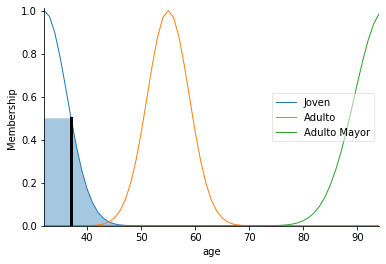

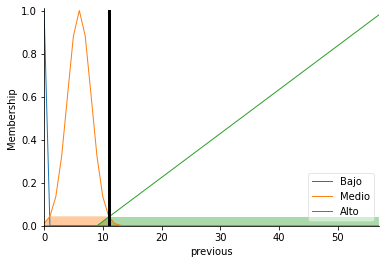

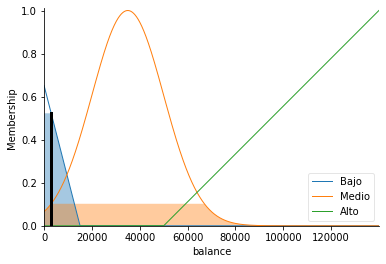

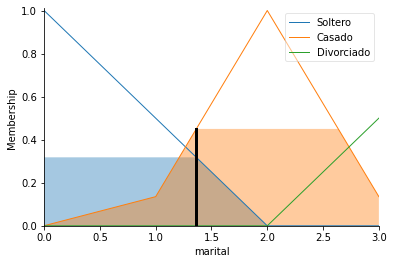

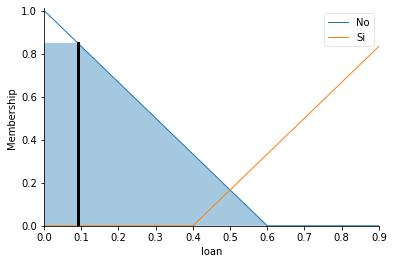

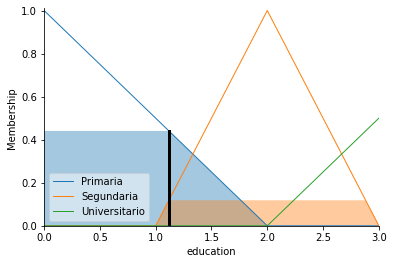

In [ ]:
age.view(sim=validate_simulator)
previous.view(sim=validate_simulator)
balance.view(sim=validate_simulator)
marital.view(sim=validate_simulator)
loan.view(sim=validate_simulator)
education.view(sim=validate_simulator)


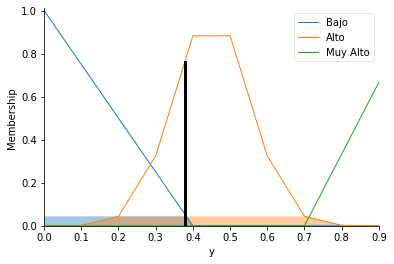

In [ ]:
y.view(sim=validate_simulator)